In [385]:
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
data = pd.read_csv('/home/pomoreq/eCommerceCustomerBehaviorAnalysis/data/data.csv', encoding='unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [283]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


eCommerceCustomerBehaviorAnalysis:
1. Preprocessing i strukturalne EDA
2. EDA biznesowe
3. Segmentacja klientów
4. Wizualizacje

Podstawowy przegląd struktury danych:

- Liczba rekordów: 5141908
- Liczba kolumn: 8
- Zakres dat:  2010-12-01 08:26:00 - 2011-12-09 12:50:00




1.Preprocessing kolumn oraz stukturalna EDA


1A. Kolumna InvoiceNo

Czy są nany?
Jest 0 nan'ów

In [284]:
data['InvoiceNo'] = data['InvoiceNo'].astype('string')
isNansInvoiceNo = data['InvoiceNo'].isna().sum()

typ danych poprawny?
Nie, zmieniam z typu danych obiekt na string ponieważ indetyfikatory zawieraja znaki nienumeryczne

In [285]:
data['InvoiceNo'] = data['InvoiceNo'].astype('string')
data.dtypes

InvoiceNo      string[python]
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Czy są powtorzenia indeytfikatora?
Tak są np faktura 573835 wystepuje 1114 razy. oznacza to ze jedna faktura to wiele pozycji

In [286]:
valueCountsInvoiceNo = data['InvoiceNo'].value_counts().sort_values(ascending=False)

 Czy długości InvoiceNo są spójne?
 Tak dla zamowienia jest dlugosc 6 a dla zwrotu 7

In [287]:
lengthOfValuesInInvoiceNo = data['InvoiceNo'].apply(len).value_counts()
lengthOfValuesInInvoiceNo

InvoiceNo
6    532618
7      9291
Name: count, dtype: int64

 Czy są dziwne znaki/spacje?
 Nie ma, wnioskuje po dlugosci wartosci

Dodaje kolumne isRefund która oznacza czy zamowienie jest zwrotem

In [288]:
data['isRefund'] = data['InvoiceNo'].str[0] == 'C'


In [289]:
onlyCData = data[data['InvoiceNo'].str[0] == 'C']


Czy invoiceNo jest alfaNumeryczny
Tak invoice  jest alfa numeryczny

In [290]:
isInvoiceNoAlnum = data['InvoiceNo'].apply(lambda s: s.isalnum()).all()
isInvoiceNoAlnum

np.True_

Ile pozycji zawiera przeciętny InvoiceNo?
(średnia liczba rekordów przypadających na jeden numer faktury)
srednia liczba rekordow to 20,9

In [291]:
meanPositionsForInvoiceNo = data.groupby('InvoiceNo')['StockCode'].count().mean()
meanPositionsForInvoiceNo

np.float64(20.923127413127414)

Czy są InvoiceNo, które mają tylko jedną pozycję?
Czy są faktury jednoitemowe?
tak istnieja takie faktury

In [292]:
isOneItemInvoiceNo = (data.groupby('InvoiceNo')['StockCode'].count() == 1).any()
isOneItemInvoiceNo

np.True_

Czy InvoiceNo są uporządkowane rosnąco względem daty?
tak bo pierwszy wiersz pokrywa sie z invoiceDateMin a ostatni z max

In [293]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,False


Czy są duże grupy duplikatów InvoiceNo z różnymi CustomerID?
czy są przypadki, że ten sam InvoiceNo ma przypisanych różnych klientów?
Nie ma takich przypadkow ze invoiceNo ma przypisanych roznych klientow

In [294]:
isInvoiceNoWithMultipleClients = data.groupby('InvoiceNo')['CustomerID'].nunique()
isInvoiceNoWithMultipleClients

InvoiceNo
536365     1
536366     1
536367     1
536368     1
536369     1
          ..
C581484    1
C581490    1
C581499    1
C581568    1
C581569    1
Name: CustomerID, Length: 25900, dtype: int64

Duplikaty w danych?
tak wystepuja duplikaty czyli invoiceNo z tym samym stocCodem np. invoice no 536409 ma dwa razy 90199C. do dalszej analizy czy jeden stockcode moze miec wiele opisow tzn np rozniace sie kolory

In [295]:
isDuplicatedInvoiceNoAndStockCode = data.duplicated(subset=['InvoiceNo','StockCode']) == True
onlyTrues = isDuplicatedInvoiceNoAndStockCode[isDuplicatedInvoiceNoAndStockCode == True]
onlyTruesIndexes = onlyTrues.index
duplicates = data.loc[onlyTruesIndexes,['InvoiceNo','StockCode']]
duplicates
onlyTrues

125       True
498       True
502       True
517       True
525       True
          ... 
541692    True
541697    True
541698    True
541699    True
541701    True
Length: 10684, dtype: bool

In [296]:
uniqueInvoiceNo = data['InvoiceNo'].nunique()
uniqueInvoiceNo

25900

1B. Kolumna StockCode

Czy są nany?
Jest 0 nan

In [297]:
isNansStockCode = data['StockCode'].isna().sum()
isNansStockCode

np.int64(0)

Czy jest prawidlowy typ danych?
Nie, jest object a prawidłowy bedzie String. poniewaz StockCode zawiera litery oraz cyfry

In [298]:
data['StockCode'] = data['StockCode'].astype('string')

Czy są podejrzane kody (np. bardzo krótkie, bardzo długie)
Są kody i krótkie (1 znakowe) i długie 12 znakowe. Analiza wykazała ze jedno znakowe to są kody systemowe, a długie to np Bank Charges. Więc mimo różnicy długości kodów
wszystkie mają znaczenie.

In [299]:
lenOfValuesStockCode = data['StockCode'].apply(len).value_counts()
lenOfValuesStockCode


StockCode
5     487036
6      51488
4       1276
1        715
3        710
7        390
2        144
12        71
9         48
8         31
Name: count, dtype: int64

Czy występują znaki nietypowe, spacje, znaki specjalne?
tak,wystepuja znaki specjalne, często są częścią np stockcode giftu.

In [300]:
isAlnumStockCode = data['StockCode'].apply(lambda s: s.isalnum()).all()
nonAlnum = data[~data['StockCode'].apply(str.isalnum)]
nonAlnum

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund
4406,536779,BANK CHARGES,Bank Charges,1,12/2/2010 15:08,15.00,15823.0,United Kingdom,False
14435,C537572,BANK CHARGES,Bank Charges,-1,12/7/2010 12:00,95.38,NaN,United Kingdom,True
28992,C538680,BANK CHARGES,Bank Charges,-1,12/13/2010 17:10,966.92,NaN,United Kingdom,True
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,12/20/2010 10:14,34.04,NaN,United Kingdom,False
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,12/23/2010 13:26,42.55,NaN,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
481152,C577342,BANK CHARGES,Bank Charges,-1,11/18/2011 15:11,490.06,NaN,United Kingdom,True
481153,C577343,BANK CHARGES,Bank Charges,-1,11/18/2011 15:13,27.21,NaN,United Kingdom,True
506357,579137,BANK CHARGES,Bank Charges,1,11/28/2011 12:51,15.00,14704.0,United Kingdom,False
534008,581127,BANK CHARGES,Bank Charges,1,12/7/2011 12:45,15.00,16271.0,United Kingdom,False


Czy są kody zawierające tylko litery / liczby / znaki specjalne?
Są kody zwierajace tylko liczby, sa kody zwierajace tylko tez tylko litery, nie ma stock code zlozonych tylkoze znakow specjalnych
Czy są StockCode o nietypowych nazwach?
Tak są, typu post,dot, są to kody systemowe

In [301]:
isOnlyLetters = data['StockCode'].apply(lambda s: s.isalpha()).any()
isOnlyLetters

np.True_

In [302]:
isOnlyLettersCheck = data['StockCode'].apply(lambda s: s.isalpha())
isOnlyLettersCheckTrueIndices = isOnlyLettersCheck[isOnlyLettersCheck == True].index
isOnlyLettersCheckRows = data.loc[isOnlyLettersCheckTrueIndices,'StockCode']
isOnlyLettersCheckRows

45        POST
141          D
386       POST
1123      POST
1814       DOT
          ... 
541540     DOT
541541       M
541730    POST
541767    POST
541768    POST
Name: StockCode, Length: 2759, dtype: string

In [303]:
isOnlySpecial = data['StockCode'].apply(lambda s: all((not c.isalnum() for c in str(s))))
isOnlySpecial

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: StockCode, Length: 541909, dtype: bool

In [304]:
isOnlySpecial = data['StockCode'].apply(lambda s:  all((not c.isalnum() for c in str(s))))
isOnlySpecialTrueIndices = isOnlySpecial[isOnlySpecial == True].index
isOnlySpecialCheckRows = data.loc[isOnlySpecialTrueIndices,'StockCode']
isOnlySpecialCheckRows

Series([], Name: StockCode, dtype: string)

sprawdzam ilość unikalnych kodów
Jest 4070 unikalnych kodoœ

In [305]:
nUniqueStockCode = data['StockCode'].nunique()
nUniqueStockCode

4070

Czy niektóre kody występują wyjątkowo często?
są kody występujące często ale nie wyjątkowo często.
Czy są StockCode, które występują tylko raz w całym zbiorze?
tak występują niektóre kody tylko raz.

In [306]:
stockCodeValueCounts = data['StockCode'].value_counts().sort_values(ascending=False)
stockCodeValueCounts

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
23664        1
23617        1
90214U       1
47591b       1
23602        1
Name: count, Length: 4070, dtype: Int64

Czy jeden StockCode może mieć więcej niż jeden Description?
Tak kod moze miec wiecej desciprtion, opisy roznia sie kolorem lub szykiem zdania opisu.

In [307]:
stockCodeAndDescription = data.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)
stockCodeAndDescription

StockCode
20713     8
23084     7
85175     6
21830     6
21181     5
         ..
20738     0
20689     0
17011A    0
16053     0
10123G    0
Name: Description, Length: 4070, dtype: int64

In [308]:
moreThanThreeDescCodes = stockCodeAndDescription[stockCodeAndDescription > 2].index
filteredThanThreeDescCodes = data[data['StockCode'].isin(moreThanThreeDescCodes)]
filteredThanThreeDescCodes
StockCode23535 = filteredThanThreeDescCodes[filteredThanThreeDescCodes['StockCode'] == '23535']
StockCode23535

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund
371806,569227,23535,BICYCLE SAFTEY WALL ART,4,10/2/2011 14:37,5.95,14051.0,United Kingdom,False
373008,569255,23535,BICYCLE SAFTEY WALL ART,72,10/3/2011 11:01,3.88,18102.0,United Kingdom,False
373020,569257,23535,BICYCLE SAFTEY WALL ART,36,10/3/2011 11:24,3.88,18102.0,United Kingdom,False
373102,569261,23535,BICYCLE SAFTEY WALL ART,2,10/3/2011 11:34,5.95,17321.0,United Kingdom,False
373582,569333,23535,BICYCLE SAFTEY WALL ART,4,10/3/2011 13:49,5.95,13431.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
538719,581413,23535,WALL ART BICYCLE SAFETY,4,12/8/2011 14:39,5.95,16833.0,United Kingdom,False
539264,581439,23535,WALL ART BICYCLE SAFETY,4,12/8/2011 16:30,12.46,NaN,United Kingdom,False
540066,581457,23535,WALL ART BICYCLE SAFETY,126,12/8/2011 18:43,3.90,18102.0,United Kingdom,False
540490,581492,23535,WALL ART BICYCLE SAFETY,4,12/9/2011 10:03,12.46,NaN,United Kingdom,False


1C. Decsription


czy są nany?
jest 1451 nanow, nie uznaje tego za bład, niektore produkty moga nie miec opisu bo są np. dopiero dodawane

In [309]:
isNansDecsription = data['Description'].isna().sum()
isNansDecsription

np.int64(1454)

sprawdzam ilość unikalnych opisów
4223 unikalnych opisów na 4070 unikalnych kodów oznacza to jeden kod moze byc przypisany do np roznych kolorow danego produktu

In [310]:
nUniqueDescription = data['Description'].nunique()
nUniqueDescription

4223

1D. Quantity
Czy są nany?
nie ma nanów

In [311]:
isNansQuantity = data['Quantity'].isna().sum()
isNansQuantity

np.int64(0)

Czy są wartości ujemne?
tak wartości ujemne quantity występują dla zwykłych prodtuktów z invoiceNo dla zwrotów, występują także dla zwykłych invoiceNo
Wtedy minusowe quantity jest w związku z uszkodzeniami,zgubieniem etc produtku.

In [312]:
isNegativeQuantity = data[data['Quantity'] < 0]
isNegativeQuantity


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,True
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,True


In [313]:
isNegativeQuantityWithoutC = isNegativeQuantity[isNegativeQuantity['InvoiceNo'].str[0] != 'C']
isNegativeQuantityWithoutC

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom,False
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom,False
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom,False
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom,False
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom,False
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom,False
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom,False
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom,False


Czy jest quantity równe zero?
nie ma rekordów z quantity równym 0

In [314]:
isZeroQuantity = data[data['Quantity'] == 0]
isZeroQuantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund


Czy są ekstrymalnie dziwne wartosci
Są dwie 80995 oraz 74215, tylko ze sa one nastepnie na minusi, wiec jest to błąd który zapewnie został skorygowany.

In [315]:
isHighQuantity = data['Quantity'].value_counts().sort_index(ascending=False)
isHighQuantity

Quantity
 80995    1
 74215    1
 12540    1
 5568     1
 4800     1
         ..
-9058     1
-9360     1
-9600     2
-74215    1
-80995    1
Name: count, Length: 722, dtype: int64

Jaka jest rozkład ilości?
Wiekszość ilości zamawianych są to małe ilości na zamówieniu typu 1,2,6,4

In [316]:
quantityValueCounts = data['Quantity'].value_counts(ascending=False)
quantityValueCounts

Quantity
 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
-135          1
 1120         1
 77           1
-900          1
 177          1
Name: count, Length: 722, dtype: int64

1E.InvoiceDate

Czy jest wlasciwy typ danych dla tej kolumny?
Nie jest właściwy typ danych, jest object, zmieniam na datetime

In [317]:
data['InvoiceDate'] =  data['InvoiceDate'].astype('datetime64[s]')



Czy są nany?
nie ma Nan

In [318]:
isNansInvoiceDate = data['InvoiceDate'].isna().sum()
isNansInvoiceDate

np.int64(0)

 – Jaki jest najstarszy i najnowszy InvoiceDate?
najstarszy to 2010-12-01,najnowyszy 2011-12-09
 – Czy dane obejmują cały rok, czy tylko wycinek?
DAne obejumja caly rok i 8 dni

In [319]:
invoiceDateMax = data['InvoiceDate'].max()
invoiceDateMin = data['InvoiceDate'].min()
listWithMinMax = list()
listWithMinMax.append([invoiceDateMax,invoiceDateMin])
listWithMinMax

[[Timestamp('2011-12-09 12:50:00'), Timestamp('2010-12-01 08:26:00')]]

Tworze zmienne pomocnicze z daty, posłużą do dalszej analizy

In [320]:
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
data['InvoiceWeekday'] = data['InvoiceDate'].dt.day_name()
data['InvoiceWeekOfYear'] = data['InvoiceDate'].dt.strftime('%Y-%U')
data['IsWeekend'] = data['InvoiceDate'].dt.day > 4
data['InvoiceHour'] = data['InvoiceDate'].dt.hour
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund,InvoiceYear,InvoiceMonth,InvoiceWeekday,InvoiceWeekOfYear,IsWeekend,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010,12,Wednesday,2010-48,False,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010,12,Wednesday,2010-48,False,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010,12,Wednesday,2010-48,False,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010,12,Wednesday,2010-48,False,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010,12,Wednesday,2010-48,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,2011,12,Friday,2011-49,True,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,2011,12,Friday,2011-49,True,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011,12,Friday,2011-49,True,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011,12,Friday,2011-49,True,12


 Czy są wartości ekstremalne (np. wszystko z jednego dnia)?
Nie ma wartości sktrymalnych w InvoiceDate

In [321]:
invoiceDateValueCounts = data['InvoiceDate'].value_counts().sort_values(ascending=False)
invoiceDateValueCounts

InvoiceDate
2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-07-24 14:50:00       1
2011-07-24 13:56:00       1
2011-11-10 15:07:00       1
2011-07-22 16:52:00       1
2011-07-24 13:14:00       1
Name: count, Length: 23260, dtype: int64

1F. Unit Price


czy jest prawidłowy typ danych?
Tak. typ danych tej kolumny to float

czy są nany?
Jest 0 nan

In [322]:
isNansUnitPrice = data['UnitPrice'].isna().sum()
isNansUnitPrice

np.int64(0)

Czy są wartości ujemne?
Dwa rekordy wartości ujemnych UnitPrice z opisem Adjust Bad Debt

In [323]:
isNegativeUnitPriceValues = data[data['UnitPrice'] < 0]
isNegativeUnitPriceValues

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund,InvoiceYear,InvoiceMonth,InvoiceWeekday,InvoiceWeekOfYear,IsWeekend,InvoiceHour
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False,2011,8,Friday,2011-32,True,14
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False,2011,8,Friday,2011-32,True,14


Czy są wartości ekstremalne?
są 4 wartosci powyzej 16 tysiecy za jeden produkt, jest tez 2515 rekordow o unitprice 0, oraz dwa wyzej wymieniony rekordy z unitprice -11062.060 spowodowane błedem

In [324]:
unitPriceValueCounts = data['UnitPrice'].value_counts().sort_index(ascending=False)
unitPriceValueCounts

UnitPrice
 38970.000       1
 17836.460       1
 16888.020       1
 16453.710       1
 13541.330       3
              ... 
 0.030           3
 0.010           1
 0.001           4
 0.000        2515
-11062.060       2
Name: count, Length: 1630, dtype: int64

ile jest unikalnych wartości
Występuje 1630 unikalnych wartości unitPrice


In [325]:
nUniqueUnitPrice = data['UnitPrice'].nunique()
nUniqueUnitPrice

1630

1G. CustomerID

czy są nan?
Usuwam rekordy bez CustomerID (~25%), ponieważ są niemożliwe do przypisania do klienta.
Analiza poprzednich kolumn wykazała, że często zawierają błędy np.manualne wpisy

In [326]:
isNansCustomerID = data['CustomerID'].isna().sum()
isNansCustomerID
data = data[~data['CustomerID'].isna()]

Czy typ danych jest odpowiedni?
Nie, jest float, zmieniam na integer

In [327]:
data['CustomerID'] = data['CustomerID'].astype('Int32')
data.dtypes

/tmp/ipykernel_49372/3307269198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID'] = data['CustomerID'].astype('Int32')


InvoiceNo            string[python]
StockCode            string[python]
Description                  object
Quantity                      int64
InvoiceDate           datetime64[s]
UnitPrice                   float64
CustomerID                    Int32
Country                      object
isRefund                    boolean
InvoiceYear                   int32
InvoiceMonth                  int32
InvoiceWeekday               object
InvoiceWeekOfYear            object
IsWeekend                      bool
InvoiceHour                   int32
dtype: object

1H. Country

czy są nany?
Jest 0 Nan

In [328]:
isNansCountry = data['Country'].isna().sum()
isNansCountry

np.int64(0)

czy są podejrzanie wartosci?
Nie występują podejrzane wartości Country
Czy występują różne warianty zapisu jednego kraju?
Nie występują rózne warianty zapisu jednego kraju.

In [329]:
valueCountsCountry = data['Country'].value_counts().sort_values(ascending=True).head(50)
valueCountsCountry

Country
Saudi Arabia                10
Bahrain                     17
Czech Republic              30
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          61
United Arab Emirates        68
Malta                      127
Greece                     146
Canada                     151
Iceland                    182
Singapore                  229
Unspecified                244
Israel                     250
USA                        291
Poland                     341
Japan                      358
Denmark                    389
Austria                    401
Sweden                     462
Cyprus                     622
Finland                    695
Channel Islands            758
Italy                      803
Norway                    1086
Australia                 1259
Portugal                  1480
Switzerland               1877
Belgium                   2069
Netherlands               2371


Czy większość danych pochodzi z jednego kraju (np. UK)?
Tak wiekszosc z uk, 361878 rekordów. stworze kolumne IsUK, może być przydatna w dalszej analizie.

In [330]:
data['IsUK'] = data['Country'].isin(['United Kingdom'])


/tmp/ipykernel_49372/2115454288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsUK'] = data['Country'].isin(['United Kingdom'])


Dodaje kolumne TotalPrice która przyda sie do dalszej analizy.

In [331]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data

/tmp/ipykernel_49372/146396965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund,InvoiceYear,InvoiceMonth,InvoiceWeekday,InvoiceWeekOfYear,IsWeekend,InvoiceHour,IsUK,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False,2011,12,Friday,2011-49,True,12,False,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False,2011,12,Friday,2011-49,True,12,False,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False,2011,12,Friday,2011-49,True,12,False,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False,2011,12,Friday,2011-49,True,12,False,16.60


Dane zostały wstępnie oczyszczone i przygotowane do dalszej analizy.
W szczególności:

Usunięto rekordy z brakującym CustomerID

Rozpoznano i oznaczono zwroty (Quantity < 0)

Stworzono nowe kolumny pomocnicze (total_price, date, month, day_of_week, hour)

Przekształcono dane czasowe na typ datetime oraz poprawiono typy pozostałych kolumn

Zidentyfikowano podstawowe anomalie: transakcje o zerowej cenie, nietypowe kody produktów, duplikaty faktur

Ta część pozwala dobrze zrozumieć strukturę danych i przygotowuje grunt pod analizę biznesową.


2. Analiza i eksploracja danych (biznesowa)

Ilu jest unikalnych klientów?
Jest 4372 unikalnych klientów

In [332]:
nuniqueClients = data['CustomerID'].nunique()
nuniqueClients

4372

Które produkty są najczęściej kupowane?
najczesciej kupowane produkty to: produkty o stockcode:  '84879', '85099B', '22197', '84077'
czyli kolejno Assorted Colour Bird Ornament, Jumbo Bag Red Retrospot, Small PopcornHolder, World War 2 Gliders. Liczba 35000 wziela sie z tego powodu ze policzylem sume quantity dla danego StockCode i wybralem sobie 4 produkty ktore zostaly sprzedany w najwiekszych ilosciach


In [333]:
groupedByStockCodeAndQuantity = data.groupby('StockCode')['Quantity'].sum()
groupedByStockCodeAndQuantity.sort_values(ascending=False)


StockCode
84077     53215
22197     48712
85099B    45066
84879     35314
85123A    34204
          ...  
21144       -12
CRUK        -16
21645       -24
D         -1194
84347     -1460
Name: Quantity, Length: 3684, dtype: int64

In [334]:
moreThan35k = groupedByStockCodeAndQuantity > 35000
moreThan35kIndices = moreThan35k[moreThan35k == True].index
productsWithMostFrequentPurchase = data[data['StockCode'].isin(moreThan35kIndices)]
productsWithMostFrequentPurchase

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund,InvoiceYear,InvoiceMonth,InvoiceWeekday,InvoiceWeekOfYear,IsWeekend,InvoiceHour,IsUK,TotalPrice
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,54.08
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,False,2010,12,Wednesday,2010-48,False,9,True,165.00
221,536390,22197,SMALL POPCORN HOLDER,100,2010-12-01 10:19:00,0.72,17511,United Kingdom,False,2010,12,Wednesday,2010-48,False,10,True,72.00
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 10:19:00,1.65,17511,United Kingdom,False,2010,12,Wednesday,2010-48,False,10,True,165.00
250,536392,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-01 10:29:00,1.69,13705,United Kingdom,False,2010,12,Wednesday,2010-48,False,10,True,27.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540377,581478,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-09 08:59:00,0.29,17364,United Kingdom,False,2011,12,Friday,2011-49,True,8,True,13.92
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,2011-12-09 09:38:00,2.08,17001,United Kingdom,False,2011,12,Friday,2011-49,True,9,True,20.80
541678,581538,22197,POPCORN HOLDER,4,2011-12-09 11:34:00,0.85,14446,United Kingdom,False,2011,12,Friday,2011-49,True,11,True,3.40
541825,581579,22197,POPCORN HOLDER,24,2011-12-09 12:19:00,0.85,17581,United Kingdom,False,2011,12,Friday,2011-49,True,12,True,20.40


In [335]:
sumOfMoreThan35K = groupedByStockCodeAndQuantity[moreThan35kIndices].sum()
sumOfMoreThan35K

np.int64(182307)

In [336]:
sumOfAll = groupedByStockCodeAndQuantity.sum()
sumOfAll

np.int64(4906888)

In [337]:
paretoIndicator = (sumOfMoreThan35K / sumOfAll) * 100
paretoIndicator

np.float64(3.715328330298144)

Metryka zagregowana: quantity top 4 produktow stanowi 3,71 % quantity wszystkich sprzedanych produktów

ile klientów je kupiło?
produkt kolejno 22197,84077,84879,85099B kupilo kolejno 408,307,639,636 osob

In [338]:
groupedByStockCodeAndCustomer = data.groupby('StockCode')['CustomerID'].unique()
groupedByStockCodeAndCustomerTopFour = groupedByStockCodeAndCustomer[moreThan35kIndices]
groupedByStockCodeAndCustomerTopFour.apply(len)

StockCode
22197     407
84077     307
84879     679
85099B    636
Name: CustomerID, dtype: int64

średnia cena produktu
212197,84077,84879,85099B to kolejno 0,83 0,29 1,68 2,01

In [339]:
groupedByStockCodeAndUnitPrice = data.groupby('StockCode')['UnitPrice'].mean()
groupedByStockCodeAndUnitPriceMeanTopFour = groupedByStockCodeAndUnitPrice[moreThan35kIndices]
groupedByStockCodeAndUnitPriceMeanTopFour

StockCode
22197     0.838023
84077     0.292029
84879     1.680860
85099B    2.013057
Name: UnitPrice, dtype: float64

jaki procent totalprice to te top 4 produkty
Top 4 produkty stanowią około 2,28 TotalPrice

In [340]:
groupedByStockCodeAndTotalPriceSum = data.groupby('StockCode')['TotalPrice'].sum()
groupedByStockCodeAndTotalPriceSumTopFour = groupedByStockCodeAndTotalPriceSum[moreThan35kIndices].sum()
AllSum = groupedByStockCodeAndTotalPriceSum.sum()
percentageOfTotalPrice = (groupedByStockCodeAndTotalPriceSumTopFour / AllSum) * 100
percentageOfTotalPrice


np.float64(2.2882733011543324)

Jacy klienci wydają najwięcej?
klient numer 14646,18102,17450,18102,12415
pochodzą oni z EIREm UK, Netherlands i Australii


In [341]:
groupedByCustomerIDandSumTotalPrice = data.groupby('CustomerID')['TotalPrice'].sum()
groupedByCustomerIDandSumTotalPrice.sort_values(ascending=False)

CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
           ...    
12503     -1126.00
17603     -1165.30
14213     -1192.20
15369     -1592.49
17448     -4287.63
Name: TotalPrice, Length: 4372, dtype: float64

In [342]:
topFiveCustomers = groupedByCustomerIDandSumTotalPrice > 123725
indicesOfTopFive = topFiveCustomers[topFiveCustomers == True].index
indicesOfTopFive

Index([12415, 14646, 14911, 17450, 18102], dtype='Int32', name='CustomerID')

In [343]:
informationAboutTopFiveCustomers = data[data['CustomerID'].isin(indicesOfTopFive)]
informationAboutTopFiveCustomers[['CustomerID','Country']].apply(lambda s: s.unique())

CustomerID               [14911, 17450, 18102, 14646, 12415]
Country       [EIRE, United Kingdom, Netherlands, Australia]
dtype: object

jaki jest procent udziału wydatkow top 5 w calkowitej sprzedazy
ich udział wynosi 11%

In [344]:
percentageOfTop5inTotalPrice = (groupedByCustomerIDandSumTotalPrice[topFiveCustomers].sum() / groupedByCustomerIDandSumTotalPrice.sum()) * 100
percentageOfTop5inTotalPrice

np.float64(11.803614235775022)

jaka jest liczba zamowien top 5 customerow?
customer kolejno 12415,14646,14911,17450,18102 zrobil 26,77,248,55,62 zamowien, kolejno ich srednia wartosc jednego zamowienia to: 4758,3629,534,3408,4316
wszyscy  to sa stali klienci powyzej 10 miesiecy.

In [345]:
aggDataTopFiveCustomers = informationAboutTopFiveCustomers.groupby('CustomerID').agg(
    orderCount = ('InvoiceNo', lambda s: len(s.unique())),
    sumTotalPrice = ('TotalPrice', 'sum'),
    firstDayOfOrder = ('InvoiceDate', lambda s: s.min()),
    lastDayOfOrder = ('InvoiceDate',lambda s: s.max())
)
aggDataTopFiveCustomers['meanOfOrder'] = aggDataTopFiveCustomers['sumTotalPrice'] / aggDataTopFiveCustomers['orderCount']
aggDataTopFiveCustomers

,orderCount,sumTotalPrice,firstDayOfOrder,lastDayOfOrder,meanOfOrder
CustomerID,,,,,
12415,26,123725.45,2011-01-06 11:12:00,2011-11-15 14:22:00,4758.671154
14646,77,279489.02,2010-12-20 10:09:00,2011-12-08 12:12:00,3629.727532
14911,248,132572.62,2010-12-01 14:05:00,2011-12-08 15:54:00,534.567016
17450,55,187482.17,2010-12-07 09:23:00,2011-12-01 13:29:00,3408.766727
18102,62,256438.49,2010-12-07 16:42:00,2011-12-09 11:50:00,4136.104677


Sprzedaż miesięczna, tygodniowa, dzienna, godzinna

In [346]:
groupedByMonthAndTotalPrice = data.groupby('InvoiceMonth')['TotalPrice'].sum()
totalSumOfMonths = groupedByMonthAndTotalPrice.sum()
groupedByMonthAndTotalPrice = groupedByMonthAndTotalPrice.reset_index()
groupedByMonthAndTotalPrice['percentageOfTotal'] = (groupedByMonthAndTotalPrice['TotalPrice'] / totalSumOfMonths) * 100
groupedByMonthAndTotalPrice

,InvoiceMonth,TotalPrice,percentageOfTotal
0,1,475074.380,5.723742
1,2,436546.150,5.259550
2,3,579964.610,6.987470
3,4,426047.851,5.133066
4,5,648251.080,7.810192
5,6,608013.160,7.325402
6,7,574238.481,6.918481
7,8,616368.000,7.426062
8,9,931440.372,11.222084
9,10,974603.590,11.742119


In [347]:
groupedByWeekdayAndTotalPrice = data.groupby('InvoiceWeekday')['TotalPrice'].sum()
totalSumOfDays = groupedByWeekdayAndTotalPrice.sum()
groupedByWeekdayAndTotalPrice = groupedByWeekdayAndTotalPrice.reset_index()
groupedByWeekdayAndTotalPrice['percentageOfTotal'] = (groupedByWeekdayAndTotalPrice['TotalPrice'] / totalSumOfDays) * 100
groupedByWeekdayAndTotalPrice

,InvoiceWeekday,TotalPrice,percentageOfTotal
0,Friday,1241316.181,14.955498
1,Monday,1274551.511,15.355921
2,Sunday,784418.851,9.450755
3,Thursday,1906108.190,22.964977
4,Tuesday,1563193.591,18.833508
5,Wednesday,1530477.490,18.439342


In [348]:
groupedByWeekOfTheYear = data.groupby('InvoiceWeekOfYear')['TotalPrice'].sum()
totalSumOfWeeks = groupedByWeekOfTheYear.sum()
groupedByWeekOfTheYear = groupedByWeekOfTheYear.reset_index()
groupedByWeekOfTheYear['percentageOfTotal'] = (groupedByWeekOfTheYear['TotalPrice'] / totalSumOfWeeks) * 100
groupedByWeekOfTheYear

,InvoiceWeekOfYear,TotalPrice,percentageOfTotal
0,2010-48,114425.150,1.378605
1,2010-49,222203.550,2.677130
2,2010-50,167045.200,2.012577
3,2010-51,50930.120,0.613611
4,2011-01,93258.060,1.123582
5,2011-02,160969.800,1.939380
6,2011-03,93747.420,1.129478
7,2011-04,103100.290,1.242162
8,2011-05,106798.210,1.286715
9,2011-06,81161.310,0.977839


In [349]:
groupedByHourAndTotalPrice = data.groupby('InvoiceHour')['TotalPrice'].sum()
totalPriceAllHours = groupedByHourAndTotalPrice.sum()
groupedByHourAndTotalPrice = groupedByHourAndTotalPrice.reset_index()

groupedByHourAndTotalPrice['percentageOfTotal'] = (groupedByHourAndTotalPrice['TotalPrice'] / totalPriceAllHours) * 100
groupedByHourAndTotalPrice

,InvoiceHour,TotalPrice,percentageOfTotal
0,6,-497.350,-0.005992
1,7,31009.320,0.373603
2,8,280103.270,3.374711
3,9,655114.831,7.892887
4,10,1150556.961,13.862022
5,11,1054638.910,12.706392
6,12,1337091.770,16.109412
7,13,1122675.430,13.526103
8,14,948603.821,11.428871
9,15,898958.860,10.830744


Średnia wartość koszyka wynosi okolo 374$

In [350]:
groupedByInvoicesAndTotalPrice = data.groupby('InvoiceNo')['TotalPrice'].sum()
meanOfInvoice = groupedByInvoicesAndTotalPrice.mean()
meanOfInvoice

np.float64(374.0453273546642)

Ilu klientów kupuje tylko raz? (churn) jest 1313 takich klientow

In [351]:
groupedByCustomerAndCountInvoice = data.groupby('CustomerID')['InvoiceNo'].nunique()
numberOfClientsWithOnePurchase = (groupedByCustomerAndCountInvoice == 1).sum()
numberOfClientsWithOnePurchase

np.int64(1313)

jaki jest %chrunu
jest to okolo 30%

In [352]:
percentageOfChrun = (numberOfClientsWithOnePurchase / nuniqueClients) * 100
percentageOfChrun

np.float64(30.032021957913997)

średni koszyk churnów to około 20,4

In [353]:
indicesOfChurn = (groupedByCustomerAndCountInvoice == 1).index
dataChurn = data[data['CustomerID'].isin(indicesOfChurn)]
meanOrderForChurn = dataChurn['TotalPrice'].mean()
meanOrderForChurn


np.float64(20.401853884555923)

In [354]:
print("Najwcześniejszy zakup churnów:", dataChurn['InvoiceDate'].min())
print("Najpóźniejszy zakup churnów:", dataChurn['InvoiceDate'].max())

Najwcześniejszy zakup churnów: 2010-12-01 08:26:00
Najpóźniejszy zakup churnów: 2011-12-09 12:50:00


 Jaka część klientów odpowiada za większość przychodu?

potrzeba 1170 klientow co stanowi 27% wszystkich klientow aby osiągnąć 80% przychodu

In [355]:
groupedByCustomerIDWithSumTotalPrice = data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
allTotalPriceSum = groupedByCustomerIDWithSumTotalPrice.sum()
groupedByCustomerIDWithSumTotalPrice = groupedByCustomerIDWithSumTotalPrice.reset_index()
groupedByCustomerIDWithSumTotalPrice['percentageOfTotalPrice'] = (groupedByCustomerIDWithSumTotalPrice['TotalPrice'] / allTotalPriceSum) * 100
groupedByCustomerIDWithSumTotalPrice['cumulativeSum'] = groupedByCustomerIDWithSumTotalPrice['percentageOfTotalPrice'].cumsum()
groupedByCustomerIDWithSumTotalPrice

,CustomerID,TotalPrice,percentageOfTotalPrice,cumulativeSum
0,14646,279489.02,3.367311,3.367311
1,18102,256438.49,3.089596,6.456907
2,17450,187482.17,2.258803,8.715710
3,14911,132572.62,1.597248,10.312958
4,12415,123725.45,1.490656,11.803614
...,...,...,...,...
4367,12503,-1126.00,-0.013566,100.099248
4368,17603,-1165.30,-0.014040,100.085208
4369,14213,-1192.20,-0.014364,100.070844
4370,15369,-1592.49,-0.019186,100.051658


In [356]:
totalLen = len(groupedByCustomerIDWithSumTotalPrice)
groupedByCustomerIDWithSumTotalPrice['percentageOfClients'] = (groupedByCustomerIDWithSumTotalPrice.index / totalLen) * 100
groupedByCustomerIDWithSumTotalPrice


,CustomerID,TotalPrice,percentageOfTotalPrice,cumulativeSum,percentageOfClients
0,14646,279489.02,3.367311,3.367311,0.000000
1,18102,256438.49,3.089596,6.456907,0.022873
2,17450,187482.17,2.258803,8.715710,0.045746
3,14911,132572.62,1.597248,10.312958,0.068618
4,12415,123725.45,1.490656,11.803614,0.091491
...,...,...,...,...,...
4367,12503,-1126.00,-0.013566,100.099248,99.885636
4368,17603,-1165.30,-0.014040,100.085208,99.908509
4369,14213,-1192.20,-0.014364,100.070844,99.931382
4370,15369,-1592.49,-0.019186,100.051658,99.954254


In [357]:
eightyPercentOfTotal= groupedByCustomerIDWithSumTotalPrice[groupedByCustomerIDWithSumTotalPrice['cumulativeSum'] >= 80]
eightyPercentOfTotal

,CustomerID,TotalPrice,percentageOfTotalPrice,cumulativeSum,percentageOfClients
1170,15057,1489.50,0.017946,80.007537,26.761208
1171,14963,1487.80,0.017925,80.025462,26.784081
1172,17002,1487.78,0.017925,80.043387,26.806953
1173,17553,1487.60,0.017923,80.061310,26.829826
1174,16395,1486.90,0.017914,80.079224,26.852699
...,...,...,...,...,...
4367,12503,-1126.00,-0.013566,100.099248,99.885636
4368,17603,-1165.30,-0.014040,100.085208,99.908509
4369,14213,-1192.20,-0.014364,100.070844,99.931382
4370,15369,-1592.49,-0.019186,100.051658,99.954254


2. Czy są różnice w zachowaniach zakupowych między krajami?
„Średni koszyk w UK vs Netherlands vs EIRE”


In [358]:
UkNedEireFromData = data[(data['Country'] == 'United Kingdom') | (data['Country'] == 'EIRE') | (data['Country'] == 'Netherlands')]
UkNedEireFromData

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund,InvoiceYear,InvoiceMonth,InvoiceWeekday,InvoiceWeekOfYear,IsWeekend,InvoiceHour,IsUK,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,2010,12,Wednesday,2010-48,False,8,True,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,False,2011,12,Friday,2011-49,True,12,True,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,False,2011,12,Friday,2011-49,True,12,True,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,False,2011,12,Friday,2011-49,True,12,True,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,False,2011,12,Friday,2011-49,True,12,True,214.80


In [359]:
groupedByThreeCountries = UkNedEireFromData.groupby('Country').agg(
    sumTotalPrice = ('TotalPrice','sum'),
    orderCount = ('InvoiceNo', lambda s: len(s.unique())),
    refundCount = ('InvoiceNo', lambda s: len((s.str[0] == 'C').unique()))
)
groupedByThreeCountries['meanOrder'] = groupedByThreeCountries['sumTotalPrice'] / groupedByThreeCountries['orderCount']
groupedByThreeCountries

,sumTotalPrice,orderCount,refundCount,meanOrder
Country,,,,
EIRE,250285.220,319,2,784.593166
Netherlands,284661.540,101,2,2818.431089
United Kingdom,6767873.394,19857,2,340.830609


 Jaki % produktów jest zwracanych? Które są najczęściej zwracane?

najczesciej zwracane sa jam making set with jars, oraz regency cakestand 3 tier

zwracane jest okolo 2% produktow z zamowien // 


In [360]:
dataForRefunds = data[data['isRefund'] == True]
uniqueDataRefunds = dataForRefunds['StockCode'].value_counts(ascending=False)
uniqueDataRefunds


StockCode
22423     181
M         175
POST       97
22960      86
D          77
         ... 
20754       1
84931B      1
22316       1
22638       1
21647       1
Name: count, Length: 1920, dtype: Int64

In [361]:
TwoMostRefundedProducts = dataForRefunds[dataForRefunds['StockCode'].isin(['22423','22960'])]
TwoMostRefundedProducts

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund,InvoiceYear,InvoiceMonth,InvoiceWeekday,InvoiceWeekOfYear,IsWeekend,InvoiceHour,IsUK,TotalPrice
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,True,2010,12,Wednesday,2010-48,False,12,True,-25.50
12402,C537373,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-06 12:55:00,12.75,14487,United Kingdom,True,2010,12,Monday,2010-49,True,12,True,-12.75
13055,C537417,22960,JAM MAKING SET WITH JARS,-1,2010-12-06 15:12:00,4.25,13481,United Kingdom,True,2010,12,Monday,2010-49,True,15,True,-4.25
14535,C537602,22423,REGENCY CAKESTAND 3 TIER,-2,2010-12-07 12:45:00,10.95,17511,United Kingdom,True,2010,12,Tuesday,2010-49,True,12,True,-21.90
18133,C537797,22423,REGENCY CAKESTAND 3 TIER,-2,2010-12-08 13:07:00,10.95,13113,United Kingdom,True,2010,12,Wednesday,2010-49,True,13,True,-21.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523337,C580507,22423,REGENCY CAKESTAND 3 TIER,-1,2011-12-04 13:37:00,12.75,15867,United Kingdom,True,2011,12,Sunday,2011-49,False,13,True,-12.75
526968,C580686,22960,JAM MAKING SET WITH JARS,-1,2011-12-05 15:28:00,4.25,15984,United Kingdom,True,2011,12,Monday,2011-49,True,15,True,-4.25
529975,C580762,22960,JAM MAKING SET WITH JARS,-2,2011-12-06 10:32:00,4.25,14543,United Kingdom,True,2011,12,Tuesday,2011-49,True,10,True,-8.50
536911,C581228,22423,REGENCY CAKESTAND 3 TIER,-6,2011-12-08 10:06:00,10.95,16019,United Kingdom,True,2011,12,Thursday,2011-49,True,10,True,-65.70


In [362]:
sumOfrefunds = len(data[data['isRefund'] == True])
percentageOfRefunds = (sumOfrefunds / len(data)) * 100
percentageOfRefunds

2.188880340388714

 Czy są klienci, którzy kupują cyklicznie?
Sprawdź, czy niektórzy robią zakupy co X dni (np. co 7–10 dni)


wybieram customera o id 12415 bo ma 26 zamowien, ale nie okazal sie cykliczny

In [363]:
customer12415Data = data[data['CustomerID'].isin([12415])]
customer12415Data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isRefund,InvoiceYear,InvoiceMonth,InvoiceWeekday,InvoiceWeekOfYear,IsWeekend,InvoiceHour,IsUK,TotalPrice
45511,540267,22078,RIBBON REEL LACE DESIGN,120,2011-01-06 11:12:00,1.85,12415,Australia,False,2011,1,Thursday,2011-01,True,11,False,222.0
45512,540267,22079,RIBBON REEL HEARTS DESIGN,120,2011-01-06 11:12:00,1.45,12415,Australia,False,2011,1,Thursday,2011-01,True,11,False,174.0
45513,540267,22080,RIBBON REEL POLKADOTS,120,2011-01-06 11:12:00,1.45,12415,Australia,False,2011,1,Thursday,2011-01,True,11,False,174.0
45514,540267,22077,6 RIBBONS RUSTIC CHARM,144,2011-01-06 11:12:00,1.45,12415,Australia,False,2011,1,Thursday,2011-01,True,11,False,208.8
45515,540267,22505,MEMO BOARD COTTAGE DESIGN,24,2011-01-06 11:12:00,4.25,12415,Australia,False,2011,1,Thursday,2011-01,True,11,False,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468150,576394,22196,SMALL HEART MEASURING SPOONS,160,2011-11-15 10:32:00,0.72,12415,Australia,False,2011,11,Tuesday,2011-46,True,10,False,115.2
468151,576394,22195,LARGE HEART MEASURING SPOONS,80,2011-11-15 10:32:00,1.45,12415,Australia,False,2011,11,Tuesday,2011-46,True,10,False,116.0
468152,576394,48194,DOORMAT HEARTS,10,2011-11-15 10:32:00,7.08,12415,Australia,False,2011,11,Tuesday,2011-46,True,10,False,70.8
468153,576394,84992,72 SWEETHEART FAIRY CAKE CASES,120,2011-11-15 10:32:00,0.42,12415,Australia,False,2011,11,Tuesday,2011-46,True,10,False,50.4


In [364]:
uniqueOrdersOfCustomer12415 = customer12415Data[['InvoiceNo','InvoiceDate']].drop_duplicates()
uniqueOrdersOfCustomer12415

,InvoiceNo,InvoiceDate
45511,540267,2011-01-06 11:12:00
50805,540557,2011-01-10 09:58:00
90166,543989,2011-02-15 09:52:00
107989,545475,2011-03-03 10:59:00
108303,C545525,2011-03-03 13:11:00
142988,548661,2011-04-01 14:28:00
170899,C551348,2011-04-28 09:49:00
193886,553546,2011-05-17 15:42:00
198380,554037,2011-05-20 14:13:00
228154,556917,2011-06-15 13:37:00


zamien sekundy na dni zeby okreslic cyklicznosc zamowien

In [365]:
diffBeetwenOrders = np.diff(uniqueOrdersOfCustomer12415['InvoiceDate'])
diffBeetwenOrders = diffBeetwenOrders / 86400
diffBeetwenOrders

array([ 3, 35, 16,  0, 29, 26, 19,  2, 25,  0, 28,  0,  5,  0, 29, 14,  0,
       33,  0, 27,  0,  0,  0, 11,  0], dtype='timedelta64[s]')

Próbka top 6 klientów z największa liczba zamówień
top 6 klientów kupuje srednio 2,43 dnia z odchyleniem totalnym standardowym 0,52 dnia.
Czy top 6 klientow jest cyklicznych? tak,
kryterium ustalam na wiecej niz 118 zamowin, sredni odstep 1-5 dni i nie wielkie odchylenie maks 3 dni, wiec totalne wyniki z tych 5 klientow spelniaja to ze sa cykliczni

In [366]:
groupedByCustomerIDandInvoiceNoForNunique = data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
groupedByCustomerIDandInvoiceNoForNunique
topSixCustomers = groupedByCustomerIDandInvoiceNoForNunique[groupedByCustomerIDandInvoiceNoForNunique > 117]
topSixCustomers.index

Index([14911, 12748, 17841, 14606, 15311, 13089], dtype='Int32', name='CustomerID')

In [367]:
topSixCustomersData = data[data['CustomerID'].isin(topSixCustomers.index)]
topSixCustomersUniqueOrdersForDiff = topSixCustomersData[['InvoiceNo','InvoiceDate','CustomerID']].drop_duplicates()
topSixCustomersUniqueOrdersForDiff = topSixCustomersUniqueOrdersForDiff.sort_values(by='InvoiceDate',ascending=True)
topSixCustomersUniqueOrdersForDiff = topSixCustomersUniqueOrdersForDiff.reset_index()
topSixCustomersUniqueOrdersForDiff

,index,InvoiceNo,InvoiceDate,CustomerID
0,106,536381,2010-12-01 09:41:00,15311
1,154,C536383,2010-12-01 09:49:00,15311
2,1016,536521,2010-12-01 12:48:00,12748
3,1404,536540,2010-12-01 14:05:00,14911
4,1424,536541,2010-12-01 14:05:00,14911
...,...,...,...,...
1004,540221,581473,2011-12-08 19:57:00,12748
1005,540253,581474,2011-12-08 20:01:00,12748
1006,541715,C581568,2011-12-09 11:57:00,15311
1007,541731,581571,2011-12-09 12:00:00,15311


In [368]:
groupByCustomerID =  topSixCustomersUniqueOrdersForDiff.groupby('CustomerID').apply(lambda s: np.diff(s['InvoiceDate']) )
groupByCustomerIDDays = groupByCustomerID.apply(lambda s: s / np.timedelta64(1,'D'))
groupByCustomerIDDays

/tmp/ipykernel_49372/3415327943.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groupByCustomerID =  topSixCustomersUniqueOrdersForDiff.groupby('CustomerID').apply(lambda s: np.diff(s['InvoiceDate']) )


CustomerID
12748                          [0.9569444444444445, 3.0388888888888888, 0.007638888888888889, 0.002777777777777778, 0.0006944444444444445, 0.004861111111111111, 0.09791666666666667, 0.052083333333333336, 0.8208333333333333, 0.14652777777777778, 0.9493055555555555, 0.9354166666666667, 0.00625, 0.16875, 0.7666666666666667, 0.06736111111111111, 0.0006944444444444445, 0.9180555555555555, 0.00625, 0.00625, 0.04722222222222222, 0.004166666666666667, 0.001388888888888889, 3.127083333333333, 0.011805555555555555, 0.86875, 1.851388888888889, 0.09444444444444444, 0.009722222222222222, 0.025694444444444443, 0.8958333333333334, 0.2951388888888889, 3.9506944444444443, 1.79375, 0.0375, 0.1451388888888889, 13.02361111111111, 0.06041666666666667, 10.813194444444445, 1.882638888888889, 30.185416666666665, 5.1097222222222225, 0.9965277777777778, 3.8694444444444445, 0.975, 7.957638888888889, 2.9631944444444445, 0.034027777777777775, 0.0020833333333333333, 0.18125, 6.845833333333333, 0.01666666

In [369]:
avgDays = groupByCustomerIDDays.apply(np.mean)
avgDays
avgTotalMean = avgDays.mean()
avgTotalMean

np.float64(2.431455373310856)

In [370]:
stdDays = groupByCustomerIDDays.apply(np.std)
stdDays
totalStdDays = np.std(stdDays)
totalStdDays

np.float64(0.5255032102440741)

7. Jak długo trwa „cykl życia klienta”?
Na analizie probki top 68 klientow wyszlo ze sredni cykl zycia klienta trwa 347 dni czyli tyle ile praktycznie trwa caly data set, lekko ponad rok trwa

In [371]:
customersForAnalyze =  groupedByCustomerIDandInvoiceNoForNunique[groupedByCustomerIDandInvoiceNoForNunique > 30]
customersForAnalyze

CustomerID
14911    248
12748    224
17841    169
14606    128
15311    118
        ... 
12682     31
16684     31
17581     31
17757     31
15856     31
Name: InvoiceNo, Length: 64, dtype: int64

In [372]:
customersForAnalyzeData = data[data['CustomerID'].isin(customersForAnalyze.index)]
customersForAnalyzeGroupBy = customersForAnalyzeData.groupby('CustomerID')['InvoiceDate'].agg([np.min,np.max])
customersForAnalyzeGroupBy['diffrence'] = customersForAnalyzeGroupBy['max'] - customersForAnalyzeGroupBy['min']
customersForAnalyzeGroupBy


/tmp/ipykernel_49372/4140641557.py:2: FutureWarning: The provided callable <function min at 0x77f7001c1d80> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  customersForAnalyzeGroupBy = customersForAnalyzeData.groupby('CustomerID')['InvoiceDate'].agg([np.min,np.max])
/tmp/ipykernel_49372/4140641557.py:2: FutureWarning: The provided callable <function max at 0x77f7001c1c60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  customersForAnalyzeGroupBy = customersForAnalyzeData.groupby('CustomerID')['InvoiceDate'].agg([np.min,np.max])


,min,max,diffrence
CustomerID,,,
12471,2010-12-02 10:37:00,2011-12-07 15:43:00,370 days 05:06:00
12569,2011-04-01 13:47:00,2011-12-07 16:24:00,250 days 02:37:00
12682,2010-12-03 13:59:00,2011-12-06 10:00:00,367 days 20:01:00
12748,2010-12-01 12:48:00,2011-12-09 12:20:00,372 days 23:32:00
12901,2011-03-14 10:41:00,2011-12-01 10:07:00,261 days 23:26:00
...,...,...,...
17949,2010-12-03 13:12:00,2011-12-08 18:46:00,370 days 05:34:00
17961,2010-12-02 19:18:00,2011-11-18 16:55:00,350 days 21:37:00
18102,2010-12-07 16:42:00,2011-12-09 11:50:00,366 days 19:08:00


In [373]:
meanDiffrence = customersForAnalyzeGroupBy['diffrence'].mean()
meanDiffrence

Timedelta('347 days 17:28:25')

Dla wszystkich klientow

In [374]:
allCustomersForAnalyzeCycleOfclient = data.groupby('CustomerID')['InvoiceDate'].agg([np.min,np.max])
allCustomersForAnalyzeCycleOfclient['diffrence'] = allCustomersForAnalyzeCycleOfclient['max'] - allCustomersForAnalyzeCycleOfclient['min']
allCustomersForAnalyzeCycleOfclient 
meanOfAllDiffrenceCycle = allCustomersForAnalyzeCycleOfclient['diffrence'].mean()
meanOfAllDiffrenceCycle

/tmp/ipykernel_49372/815378528.py:1: FutureWarning: The provided callable <function min at 0x77f7001c1d80> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  allCustomersForAnalyzeCycleOfclient = data.groupby('CustomerID')['InvoiceDate'].agg([np.min,np.max])
/tmp/ipykernel_49372/815378528.py:1: FutureWarning: The provided callable <function max at 0x77f7001c1c60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  allCustomersForAnalyzeCycleOfclient = data.groupby('CustomerID')['InvoiceDate'].agg([np.min,np.max])


Timedelta('133 days 17:25:29')

📊 2. Analiza biznesowa – Podsumowanie
W tej sekcji skupiono się na zachowaniach klientów i analizie sprzedaży w czasie:

Ustalono liczbę unikalnych klientów oraz najpopularniejsze produkty

Zidentyfikowano klientów generujących największe przychody

Przeanalizowano sprzedaż w podziale na miesiące, tygodnie i dni – oraz rozkład godzinowy

Obliczono średnią wartość koszyka i zidentyfikowano klientów jednorazowych (churn)

Przeprowadzono analizę Pareto (20/80) oraz porównano średnie koszyki w różnych krajach

Oceniono jakość produktów przez analizę zwrotów

Sprawdzono cykliczność zakupów i długość życia klienta

Wnioski z tej części zostaną rozwinięte w końcowym raporcie (README.md).

2. Analiza Biznesowa Wnioski:
Wykazano, że jest 4372 unikalnych klientow.

Top 4 produkty zostały wybrane na podstawie zsumowanego quantity przekraczającego 35000 sprzedanych sztuk. Są to produkty o niskich cenach. Wykazano także że ich suma ilości sprzedazy sztuk jest to około 3,7% całego quantity sprzedaży co stanowi, wynik bardzo zadowalający jak na to że to sa małe i tanie produtky. te produtky zostały kupione przez conajmniej 300 unikalnych klientów. Ich wkład w TotalPrice wyniósl 2.28 % co tak samo jak wyżej stanowi doskonały wynik.

Następnie przeanalizowano top 5 klientów pod wzgledem wkładu w TotalPrice. Są to obywatele z EIRE, UK, Australii, Netherlands. Wiekszość klientów jest z UK więc, to że w top 5 znalezli sie klienci innych nacji, stanowi ważna obserwacje, która skłania do zastanowienia czy powinnismy bardziej zainteresowac klientów z poza UK.
Ich udział w ogólnym total price wyniósl 11%. Wykonują oni wiele zamówien o dużych wartościach. Trzeba, pomyślec jak ich na absolutnie dlugi czas zatrzymac.

Przeanalizowano także sprzedaze: miesieczna,dzienna,tygodniowa oraz godzinna:
Miesieczna wykazalo ze miesiace jesieni od 9 do 11, są najbardziej goracymi miesiącami. Te miesiace odpowiadaja, za ogromna ilosc, skumulowanej sprzedazy. ponad 35%
Za to dzienna analiza wykazala, ze najbardziej gorace dni to przedzial wtorek-czwartek. te dni odpowiadaja az za ponad 58% skumulowanej sumy totalnej sprzedazy.
Analiza sprzedazy godzinowej dzienne wkyazala ze godziny 10-13 to najlepszy przedzial na zakupy. te godizny odpowiadaja za ponad 50% total price.

Analiza sredniego koszyka wykazala ze sredni koszyl czyli unikalne invoiceNo wynoilo 374$.

Anliza klientów wykazała bardzo niepokjoacy wniosek, churnow, czyli klientow robiacych tylko 1 zakup jest 1313 co stanowi az 30% ogólu. Trzeba podjąc odpowiednie dzialania w tym kierunku. mimo ze ich sredni okoszyl to tylko 20,4 ale jest ich bardzo duzo, moze to byc zmarnowany potencjal na potencjalnie duza grupe klientow oraz ich kapital.

Analiza Pareto 20/80, wykazala ze potrzeba 27% wszystkich klientow aby osiganac 80% totalPrice, metryka ta wskazuje,ze przedewszystkim nasza sila moze tkwic w nie mocy zakupowej jednego klienta, a wlasnie w ilosci klientow.

Analiza refundow dzieki, feature engineering kolumny isRefund, wykazala ze tylko 2% zamowien jest zwracanych.

Zostala wykonana analiza na top 6 klientow pod ilosci  wzgledem unikalnych zamowien. Przeprowadzona analiza miala za zadanie okreslic czy są cykliczni. Wyszlo ze ci klienci, w sumie wykonuja zakupy sredni co 2,43 dnia z odchylem okolo 0.5 dnia. Wiec są to bardzo wazni klienci.

Analiza randomowej probki 64 wykazala ze sredni cykl zycia klienta trwa 347 dni, czyli caly orkes datasetu praktycznie, wiec, postanowilem ze nie jest to wartosciowa dedukcja, nastepnie przeanalizowalem wszystkich klientow, wynik juz wyszedl bardziej umozliwiajacy wyciagniecie wnioskow i wdrozenie dzialan. wiec cykl zycia przecietnego klienta to 133 dni. widac tu także mocne oddzialowanie churnu na wynik, jest on 2 razy mniejszy, to pokazuje przepasc miedzy naszymi lojalnymi,vipami a standardami a churnem, pod wzgledem ilosci takich klientow. 

Wnioski te będą punktem wyjścia do wizualizacji oraz rekomendacji.

3. Segmentacja

In [375]:
groupedByCustomer = data.groupby('CustomerID').agg(
    orderCount = ('InvoiceNo','nunique'),
    totalSpent = ('TotalPrice','sum'),
    lastPurchase = ('InvoiceDate','max')
)
groupedByCustomer['meanBasket'] = groupedByCustomer['totalSpent'] / groupedByCustomer['orderCount']
groupedByCustomer = groupedByCustomer.reset_index()

In [376]:
vipVar = groupedByCustomer['totalSpent'].quantile(0.85)
segmentationStatus = ['VIP','asleep','Loyal','churn']
artificalToday = data['InvoiceDate'].max()
recentThreshold = artificalToday - pd.Timedelta(days=30)
conditions = [
    ((groupedByCustomer['orderCount'] > 20) & (groupedByCustomer['totalSpent'] >= vipVar)),  
    ((groupedByCustomer['orderCount'] > 5) & (groupedByCustomer['lastPurchase'] < recentThreshold)),  
    (groupedByCustomer['orderCount'] > 10),  
    (groupedByCustomer['orderCount'] == 1),  
]
groupedByCustomer['customerSegment'] = np.select(conditions,segmentationStatus,default='Standard')
groupedByCustomer

,CustomerID,orderCount,totalSpent,lastPurchase,meanBasket,customerSegment
0,12346,2,0.00,2011-01-18 10:17:00,0.000000,Standard
1,12347,7,4310.00,2011-12-07 15:52:00,615.714286,Standard
2,12348,4,1797.24,2011-09-25 13:13:00,449.310000,Standard
3,12349,1,1757.55,2011-11-21 09:51:00,1757.550000,churn
4,12350,1,334.40,2011-02-02 16:01:00,334.400000,churn
...,...,...,...,...,...,...
4367,18280,1,180.60,2011-03-07 09:52:00,180.600000,churn
4368,18281,1,80.82,2011-06-12 10:53:00,80.820000,churn
4369,18282,3,176.60,2011-12-02 11:43:00,58.866667,Standard
4370,18283,16,2094.88,2011-12-06 12:02:00,130.930000,Loyal


In [377]:
valueCountsForSegments = groupedByCustomer['customerSegment'].value_counts()
valueCountsForSegments

customerSegment
Standard    2367
churn       1313
asleep       300
Loyal        254
VIP          138
Name: count, dtype: int64

Metryka dla customerSegment

In [378]:
groupedByCustomerSegment = groupedByCustomer.groupby('customerSegment').agg(
    orderCount = ('orderCount','sum'),
    totalPrice = ('totalSpent','sum')
)
groupedByCustomerSegment['meanOfOrder'] = groupedByCustomerSegment['totalPrice'] / groupedByCustomerSegment['orderCount']
groupedByCustomerSegment = groupedByCustomerSegment.reset_index()
groupedByCustomerSegment

,customerSegment,orderCount,totalPrice,meanOfOrder
0,Loyal,3718,1220349.340,328.227364
1,Standard,9062,2723731.313,300.566245
2,VIP,5503,3147818.080,572.018550
3,asleep,2594,774382.410,298.528300
4,churn,1313,433784.671,330.376749


3. Segmentacja klientów – Podsumowanie
Na podstawie agregacji danych klientów utworzono trzy główne segmenty:

Lojalni – klienci z wieloma zakupami

Uśpieni (churn) – klienci, którzy kupili tylko raz

VIP – klienci o wysokiej wartości zakupów

Asleep - klienci którzy wykonali pare zamowien, ale zadnego od 30 dni

Dla każdego segmentu policzono podstawowe metryki:
liczbę zamówień, łączną wartość zakupów, średnią wartość koszyka i datę ostatniego zakupu.
Segmenty zostaną wykorzystane w dalszych analizach i wizualizacjach.

Na podstawie segmentacji opartej na liczbie zakupów, czasie ostatniego zakupu oraz wartości koszyka wyróżniliśmy pięć głównych grup klientów: Standard, Loyal, VIP, Asleep oraz Churn.

Standardowi klienci stanowią najliczniejszą grupę (ponad połowa bazy). Kupili więcej niż raz, ale nie osiągają progów lojalności ani VIP.

VIP to najmniejsza grupa pod względem liczby, ale generują najwyższe przychody – ich średnia wartość koszyka znacznie przewyższa inne segmenty.

Lojalni klienci dokonali wielu zakupów i utrzymują wysoki poziom zaangażowania, co czyni ich stabilną i wartościową grupą.

Asleep to klienci, którzy kupili więcej niż raz, ale nie wrócili od ponad 30 dni – potencjalni do reaktywacji.

Churn to osoby, które kupiły tylko raz i nigdy nie wróciły – ich wpływ na sprzedaż był relatywnie niewielki.

Rekomendacje:

Skoncentrować działania retencyjne na klientach Asleep, którzy już wykazali zaangażowanie.

Rozważyć specjalne oferty lub program lojalnościowy, aby przekształcić Standard w Loyal.

Utrzymać wysoką jakość i indywidualne podejście dla grupy VIP, by nie dopuścić do ich odpływu.

Grupa Churn nie stanowi strategicznego problemu – ich wkład finansowy był marginalny.

4. Wizaulizacje

1. Histogram zamówień na klienta

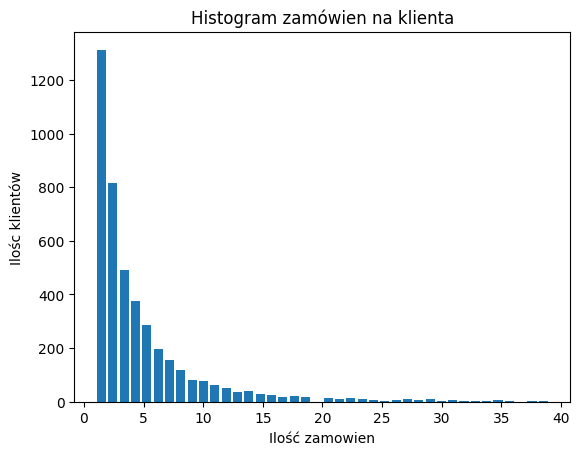

In [379]:
groupedByCustomerAndCountInvoice

plt.hist(x=groupedByCustomerAndCountInvoice[groupedByCustomerAndCountInvoice < 40],bins=40,rwidth=0.8)
plt.title('Histogram zamówien na klienta')
plt.ylabel('Ilośc klientów')
plt.xlabel('Ilość zamowien')
plt.savefig('histogramZamowien')
plt.show()


 2. Barplot miesięcznej sprzedaży

In [380]:
groupedByMonthAndTotalPrice

,InvoiceMonth,TotalPrice,percentageOfTotal
0,1,475074.380,5.723742
1,2,436546.150,5.259550
2,3,579964.610,6.987470
3,4,426047.851,5.133066
4,5,648251.080,7.810192
5,6,608013.160,7.325402
6,7,574238.481,6.918481
7,8,616368.000,7.426062
8,9,931440.372,11.222084
9,10,974603.590,11.742119


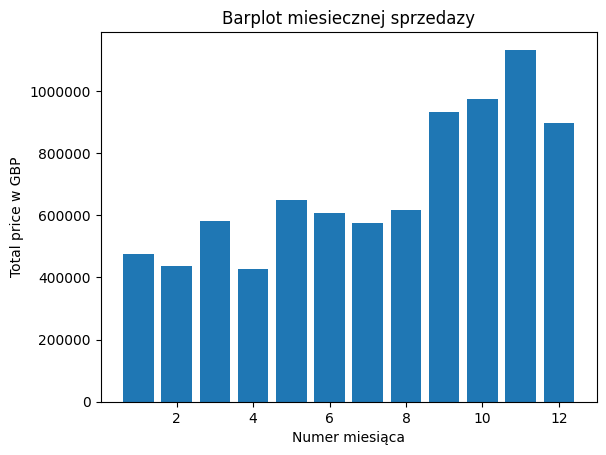

In [381]:
plt.bar(x=groupedByMonthAndTotalPrice['InvoiceMonth'],height=groupedByMonthAndTotalPrice['TotalPrice'])
plt.ylabel('Total price w GBP')
plt.xlabel('Numer miesiąca')
plt.title('Barplot miesiecznej sprzedazy')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.savefig('barplotSprzedazyMiesiecznej')
plt.show()

 3. Barplot dziennej sprzedaży (day of week)

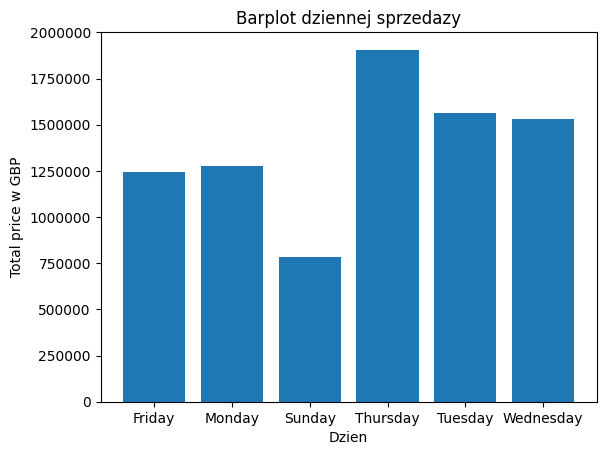

In [382]:
plt.bar(x=groupedByWeekdayAndTotalPrice['InvoiceWeekday'],height=groupedByWeekdayAndTotalPrice['TotalPrice'])
plt.ylabel('Total price w GBP')
plt.xlabel('Dzien')
plt.title('Barplot dziennej sprzedazy')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.savefig('barplotSprzedazyDziennej')
plt.show()

 4. Barplot godzinowej sprzedaży (hour)

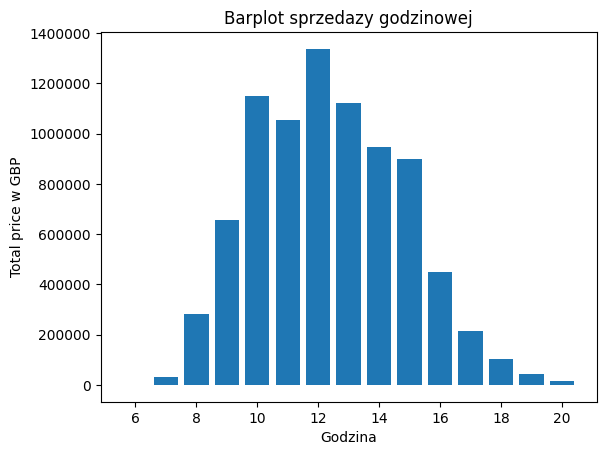

In [383]:
plt.bar(x=groupedByHourAndTotalPrice['InvoiceHour'],height=groupedByHourAndTotalPrice['TotalPrice'])
plt.ylabel('Total price w GBP')
plt.xlabel('Godzina')
plt.title('Barplot sprzedazy godzinowej')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.savefig('barplotSprzedazyGodzinowej')
plt.show()

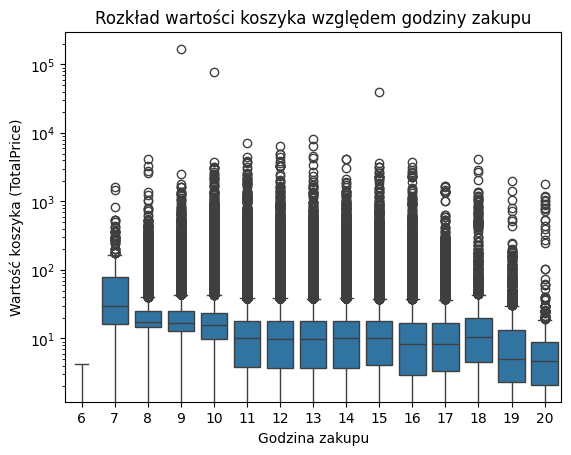

In [414]:
sns.boxplot(x='InvoiceHour',y='TotalPrice', data=data)
plt.title('Rozkład wartości koszyka względem godziny zakupu')
plt.xlabel('Godzina zakupu')
plt.ylabel('Wartość koszyka (TotalPrice)')
plt.yscale('log')
plt.savefig('boxplotWartosciKoszykaWzgledemGodzinyZakupu')
plt.show()

 Barplot średniego koszyka vs kraj
  

In [395]:
groupedByThreeCountries

,sumTotalPrice,orderCount,refundCount,meanOrder
Country,,,,
EIRE,250285.220,319,2,784.593166
Netherlands,284661.540,101,2,2818.431089
United Kingdom,6767873.394,19857,2,340.830609


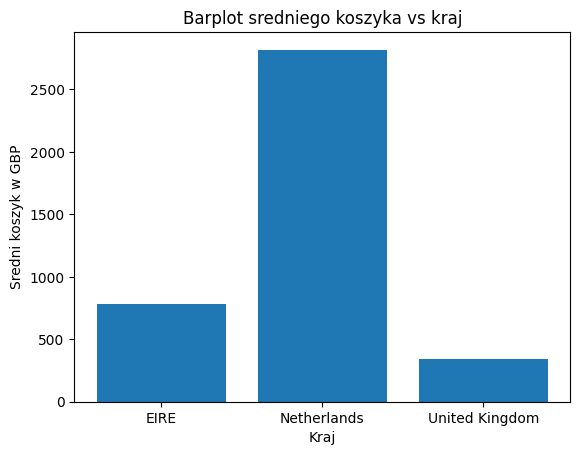

In [413]:
plt.bar(x=groupedByThreeCountries.index,height=groupedByThreeCountries['meanOrder'])
plt.title('Barplot sredniego koszyka vs kraj')
plt.ylabel('Sredni koszyk w GBP')
plt.xlabel('Kraj')
plt.savefig('barplotSredniegoKoszykaTop3Krajów')
plt.show()

Heatmapa: dzień tygodnia vs godzina (aktywność klientów) (suma total price)


In [ ]:
pivotTable = data.pivot_table(index='InvoiceWeekday',
                              columns='InvoiceHour',
                              values='TotalPrice',
                              aggfunc='sum',
                              fill_value=0)
pivotTable

,InvoiceHour,InvoiceWeekday,0
0,6,Friday,0.00
1,6,Monday,0.00
2,6,Sunday,0.00
3,6,Thursday,-497.35
4,6,Tuesday,0.00
...,...,...,...
85,20,Monday,0.00
86,20,Sunday,0.00
87,20,Thursday,2966.73
88,20,Tuesday,0.00


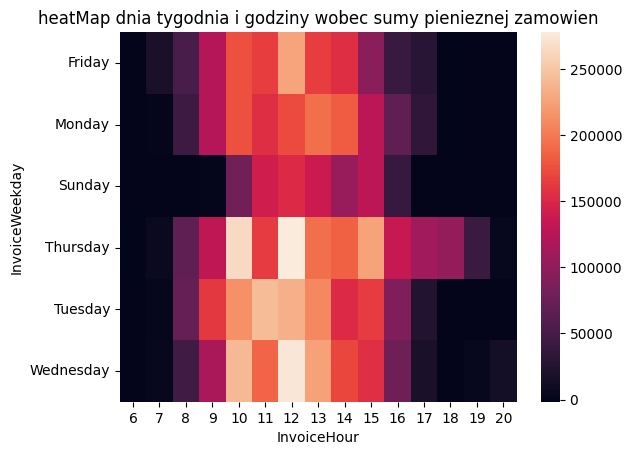

In [412]:
sns.heatmap(data=pivotTable)
plt.title('heatMap dnia tygodnia i godziny wobec sumy pienieznej zamowien')
plt.savefig('heatmapTotalPrice')
plt.show()

Heatmapa: dzień tygodnia vs godzina (aktywność klientów) (ilosc unikalnych zamowien)

In [408]:
pivotTableSecond = data.pivot_table(index='InvoiceWeekday',
                              columns='InvoiceHour',
                              values='InvoiceNo',
                              aggfunc='nunique',
                              fill_value=0)
pivotTableSecond

InvoiceHour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
InvoiceWeekday,,,,,,,,,,,,,,,
Friday,0,8,129,313,470,424,540,470,395,323,169,102,3,9,1
Monday,0,4,90,269,373,417,571,546,440,389,273,130,10,0,0
Sunday,0,0,0,5,252,410,509,377,336,341,112,0,0,0,0
Thursday,22,9,142,342,540,490,667,551,549,492,377,329,237,206,26
Tuesday,0,5,127,340,487,535,617,534,430,412,235,163,7,0,0
Wednesday,0,5,120,353,491,494,693,565,495,448,325,118,0,2,1


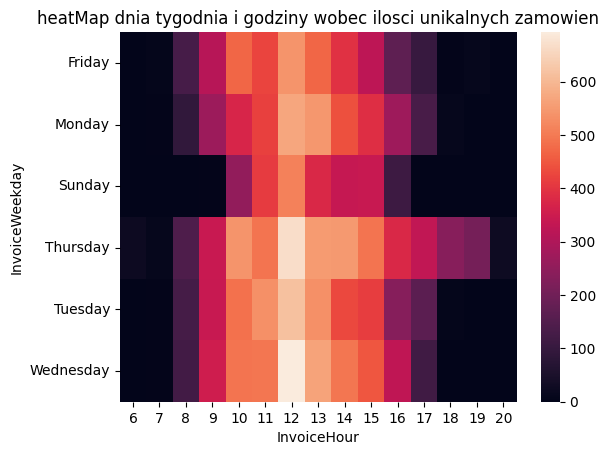

In [415]:
sns.heatmap(data=pivotTableSecond)
plt.title('heatMap dnia tygodnia i godziny wobec ilosci unikalnych zamowien')
plt.savefig('heatMapInvoiceNoNunique')
plt.show()

Pie chart udziału segmentów klientów

In [418]:
valueCountsForSegments = valueCountsForSegments.reset_index()
valueCountsForSegments

,customerSegment,count
0,Standard,2367
1,churn,1313
2,asleep,300
3,Loyal,254
4,VIP,138


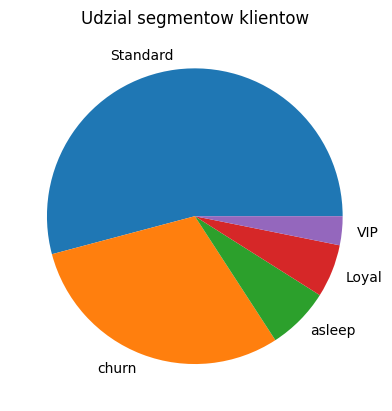

In [423]:
plt.pie(valueCountsForSegments['count'],labels=valueCountsForSegments['customerSegment'])
plt.title('Udzial segmentow klientow')
plt.savefig('pieChartUdzialuSegmentow')
plt.show()

 Barplot metryk per segment (ilość, suma, średnia)

In [422]:
groupedByCustomerSegment

,customerSegment,orderCount,totalPrice,meanOfOrder
0,Loyal,3718,1220349.340,328.227364
1,Standard,9062,2723731.313,300.566245
2,VIP,5503,3147818.080,572.018550
3,asleep,2594,774382.410,298.528300
4,churn,1313,433784.671,330.376749


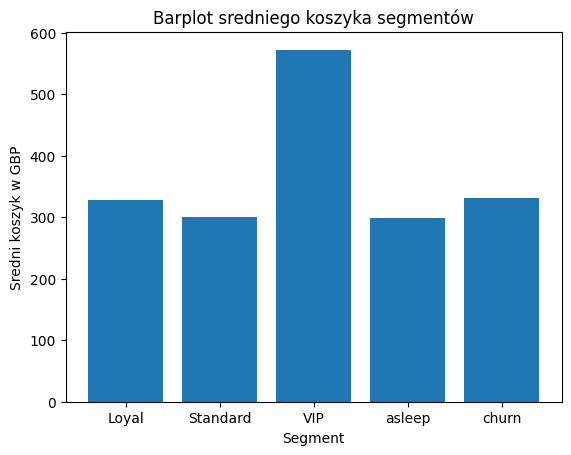

In [426]:
plt.bar(x=groupedByCustomerSegment['customerSegment'],height=groupedByCustomerSegment['meanOfOrder'])
plt.title('Barplot sredniego koszyka segmentów')
plt.ylabel('Sredni koszyk w GBP')
plt.xlabel('Segment')
plt.savefig('barplotSredniegoKoszykaSegmentow')
plt.show()

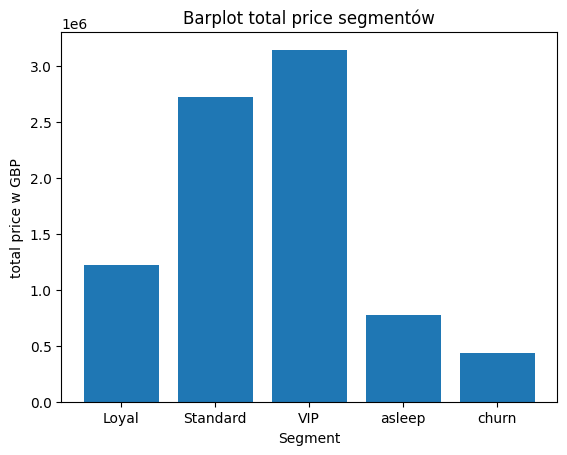

In [427]:
plt.bar(x=groupedByCustomerSegment['customerSegment'],height=groupedByCustomerSegment['totalPrice'])
plt.title('Barplot total price segmentów')
plt.ylabel('total price w GBP')
plt.xlabel('Segment')
plt.savefig('barplotTotalPriceSegmentow')
plt.show()

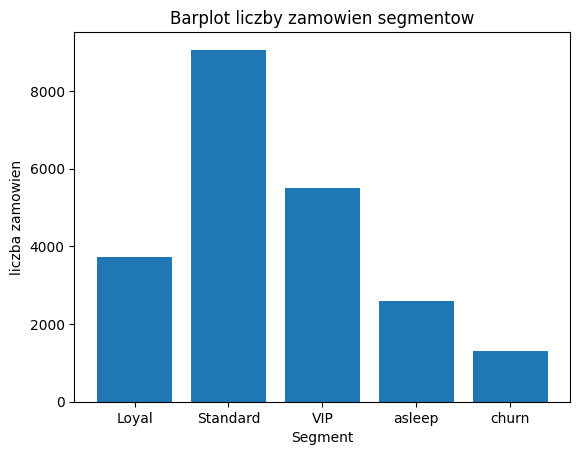

In [429]:
plt.bar(x=groupedByCustomerSegment['customerSegment'],height=groupedByCustomerSegment['orderCount'])
plt.title('Barplot liczby zamowien segmentow')
plt.ylabel('liczba zamowien')
plt.xlabel('Segment')
plt.savefig('barplotZamowienSegmentow')
plt.show()